# Data Science Intern @ LetsGrowMore

# Author : Shailendra Lowanshi

# Task -1

# BEGINNER LEVEL TASK 1

# 1) Iris Flowers Classification ML Project :

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities

Datasetlink : http://archive.ics.uci.edu/ml/datasets/Iris

# Import Libraries

In [1]:
# Importing Libraries
import os
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Getting Data
Iris = pd.read_csv("E:\Data Science\Python\All Datasets/iris.csv")
Iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [6]:
Iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Data Pre-processing

In [7]:

x = Iris.iloc[:, [0, 1, 2, 3]].values  #feature value
y = Iris.Species                       #target value

In [8]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
Iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [11]:
Iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
Iris.shape

(150, 5)

# Exploratory Data Analysis

# Pie Chart

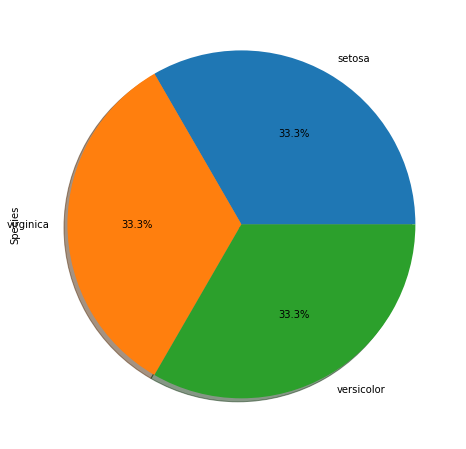

In [49]:
Iris['Species'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

# Count Plot

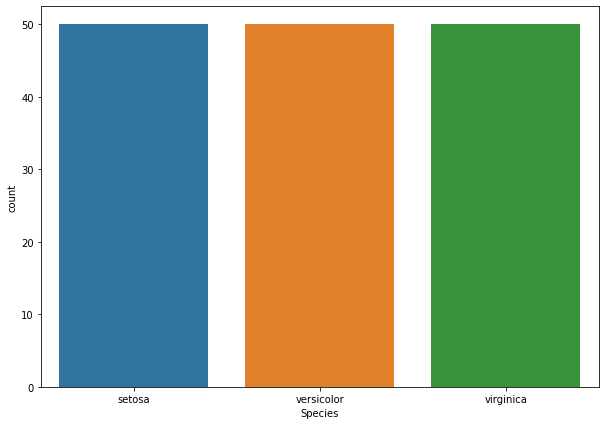

In [17]:
plt.figure(figsize = (10,7))
sns.countplot(x = Iris.Species)
plt.show()

# Scatter Plot

[Text(0.5, 1.0, 'PetalLength & PetalWidth'), Text(0, 0.5, 'petal-width')]

<Figure size 432x288 with 0 Axes>

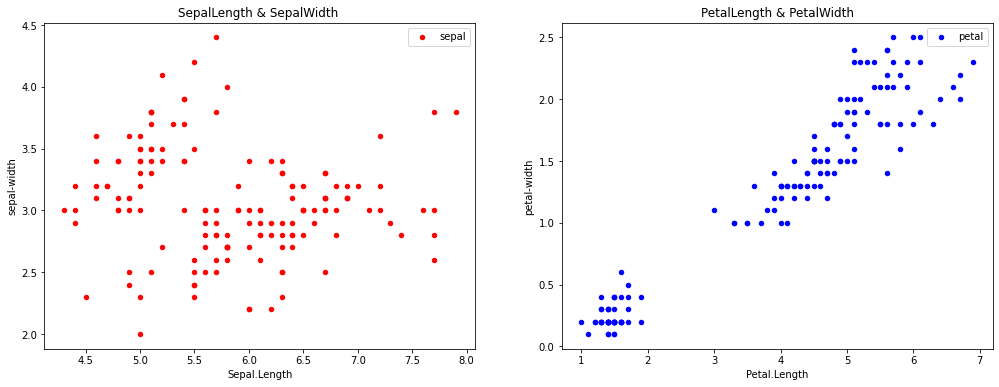

In [23]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(17, 6))
Iris.plot(x="Sepal.Length",y="Sepal.Width",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
Iris.plot(x="Petal.Length",y="Petal.Width",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='SepalLength & SepalWidth ', ylabel='sepal-width')
ax[1].set(title='PetalLength & PetalWidth',  ylabel='petal-width')

# Pair Plot

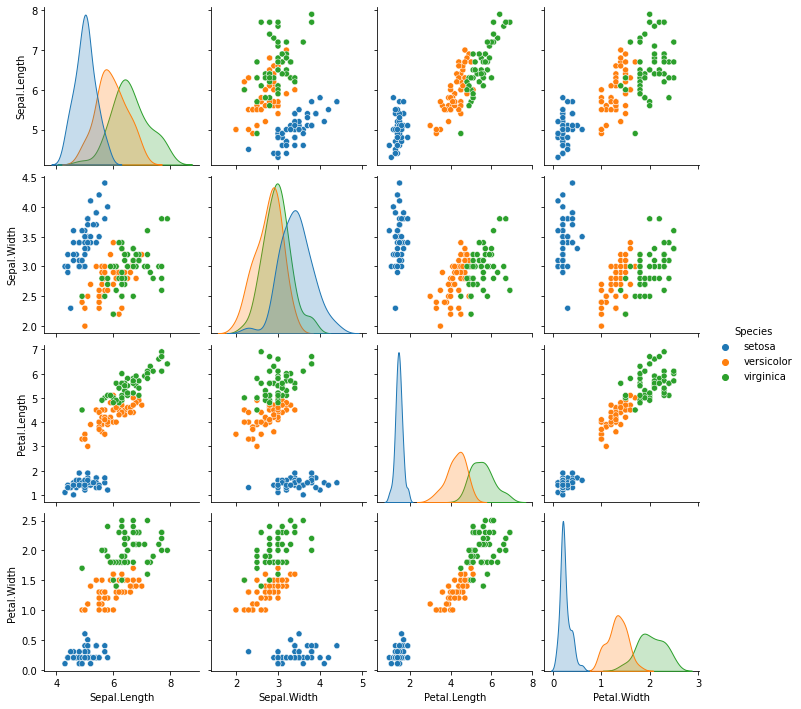

In [30]:
sns.pairplot(Iris, hue = "Species") #pair plot

# FaceGrid

C:\Users\Baccchi\anaconda3\envs\Machine_Learning_Class\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


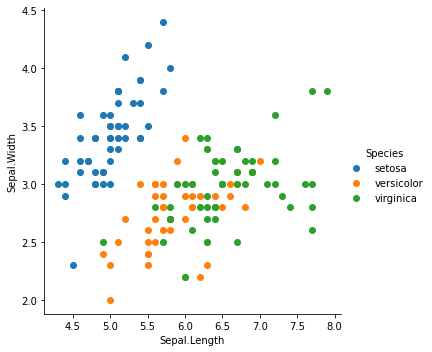

In [37]:
sns.FacetGrid(Iris,hue='Species',size=5)\
.map(plt.scatter,'Sepal.Length','Sepal.Width')\
.add_legend()

# Heat Map

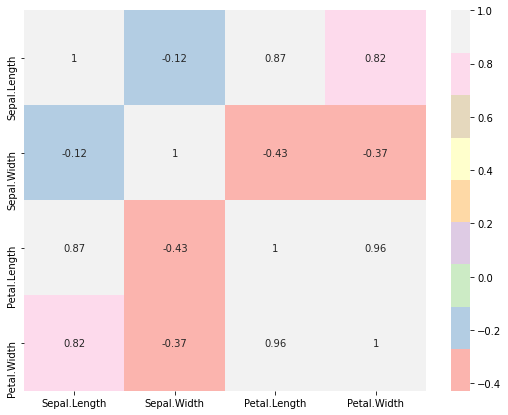

In [44]:
plt.figure(figsize=(9,7))
sns.heatmap(Iris.corr(),annot=True,cmap='Pastel1')
plt.show()

# Decision Tree Classifier

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=20)

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=20)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.990
Accuracy on test set: 0.889


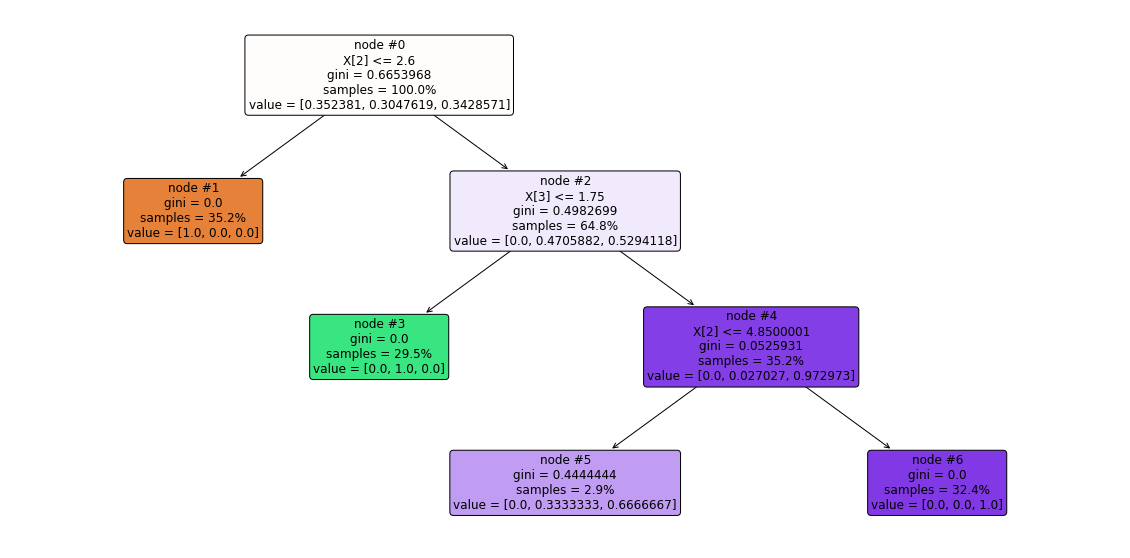

In [48]:
#plot a tree
plt.figure(figsize=(20,10))
plot_tree(tree,max_depth = 6,filled = True, node_ids = True, proportion = True, rounded = True, precision = 7, fontsize = 12)
plt.show()